In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split



# 1 - Loading The Dataset

In [144]:

#link to dataset https://www.kaggle.com/code/anandhuh/climate-prediction-random-forest-94-accuracy/data?select=temps.csv

df=pd.read_csv("C:\\Users\\user\\Downloads\\temps.csv")

df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [146]:
df.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

<p> It can be observed that there are no null values in the dataset</p>


# 2 - Explatory Data Analysis 

<AxesSubplot:>

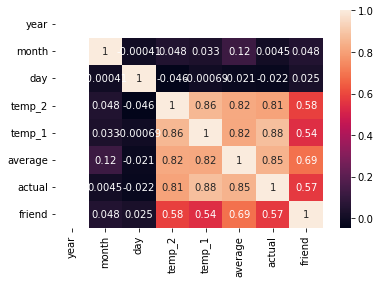

In [147]:
sns.heatmap(df.corr(),annot=True)


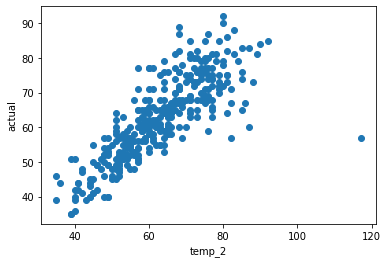

In [148]:
plt.scatter(df['temp_2'],df['actual'])

plt.xlabel('temp_2')
plt.ylabel('actual')
plt.show()

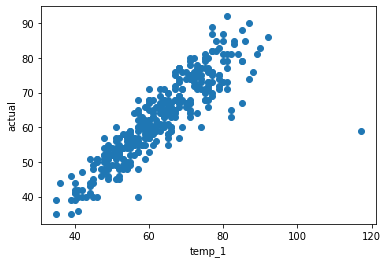

In [149]:
plt.scatter(df['temp_1'],df['actual'])
plt.xlabel('temp_1')
plt.ylabel('actual')
plt.show()

<p> First lets try the random forest regressor without dropping any numerical attributes</p>

<p> Let us first scale the features
    
   
    
    

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
Y=df['actual'].values
X=df.drop(['actual','week'],axis=1)

In [152]:
X.head()

,year,month,day,temp_2,temp_1,average,friend
0,2019,1,1,45,45,45.6,29
1,2019,1,2,44,45,45.7,61
2,2019,1,3,45,44,45.8,56
3,2019,1,4,44,41,45.9,53
4,2019,1,5,41,40,46.0,41


# 3 - Model Selection

In [153]:
# Train test split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)



In [154]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)









In [155]:
# Model

from sklearn.ensemble import RandomForestRegressor

rfReg=RandomForestRegressor(n_estimators=200,random_state=1)


rfReg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [156]:
Y_pred=rfReg.predict(X_test)

Y_pred




array([58.615, 74.57 , 69.82 , 73.795, 73.045, 60.265, 51.84 , 45.34 ,
       66.185, 74.18 , 45.31 , 77.025, 65.375, 78.21 , 55.645, 60.44 ,
       40.85 , 49.27 , 55.72 , 73.825, 53.565, 75.52 , 79.86 , 83.185,
       61.495, 48.355, 80.395, 73.925, 62.355, 37.655, 62.52 , 57.35 ,
       65.94 , 63.32 , 79.995, 71.615, 71.34 , 51.505, 41.005, 51.905,
       77.925, 68.465, 62.81 , 42.77 , 74.625, 68.16 , 64.93 , 68.18 ,
       72.53 , 54.405, 69.65 , 66.33 , 65.1  , 44.465, 73.805, 75.345,
       41.505, 75.04 , 53.66 , 61.77 , 76.26 , 49.19 , 80.81 , 52.305,
       59.595, 52.28 , 61.67 , 52.325, 59.455, 76.36 ])

In [181]:
# accuracy score

from sklearn.metrics import r2_score


In [182]:

print(f'The Coeffiecient of Determination (R2 Score) is : ',r2_score(Y_test,Y_pred))


The Coeffiecient of Determination (R2 Score) is :  0.81717664916092


<p> As we can see,the R2 Score is good, but lets try to improve it by checking the feature importance of the features</p>

In [163]:
# feauture importance scores

cols_list=list(X.columns)

for name,score in zip(cols_list,rfReg.feature_importances_):
    print(name,score)

year 0.0
month 0.013970603028255354
day 0.025318424365925876
temp_2 0.02688131001289727
temp_1 0.589868347767277
average 0.31531029837408575
friend 0.02865101645155888


<p> From the scores above, we will only consider the feautures temp_1 and average</p>

In [170]:
X_new=X.copy()

X_new.head()

# Removing the non-required features

X_new=X_new.iloc[:,4:6]

X_new.head()



,temp_1,average
0,45,45.6
1,45,45.7
2,44,45.8
3,41,45.9
4,40,46.0


In [172]:
# train test split
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X_new,Y,test_size=0.2,random_state=1)



In [173]:
# Scaling
X_train_new=scaler.fit_transform(X_train_new)
X_test_new=scaler.transform(X_test_new)

In [174]:
rfReg.fit(X_train_new,Y_train_new)

RandomForestRegressor(n_estimators=200, random_state=1)

In [176]:
y_pred_new=rfReg.predict(X_test_new)

y_pred_new

array([58.505     , 75.59      , 71.79      , 70.595     , 64.915     ,
       60.265     , 53.04833333, 45.115     , 64.815     , 75.415     ,
       45.00166667, 78.685     , 64.495     , 77.91      , 54.745     ,
       59.64      , 38.27833333, 49.82208333, 56.46      , 74.835     ,
       53.14      , 75.705     , 78.405     , 86.065     , 61.21      ,
       49.235     , 85.145     , 77.095     , 58.295     , 37.90166667,
       63.285     , 56.78      , 65.424     , 64.86      , 85.75      ,
       71.5       , 68.565     , 52.025     , 44.02145833, 51.56      ,
       78.905     , 66.585     , 60.145     , 43.385     , 71.2       ,
       67.815     , 61.92633333, 66.65875   , 68.835     , 55.51      ,
       68.7475    , 68.385     , 69.16683333, 46.23708333, 75.27      ,
       79.175     , 40.06833333, 76.79      , 52.58      , 62.945     ,
       74.945     , 46.965     , 76.17      , 53.85      , 59.345     ,
       50.695     , 63.28      , 51.695     , 56.695     , 75.57

In [180]:

print(f'The Coeffiecient of Determination (R2 Score) is : ',r2_score(Y_test_new,y_pred_new))

The Coeffiecient of Determination (R2 Score) is :  0.7950079710398562


#### so it seems that dropping more features is not a good option since the R2 Score has decreased, so we should keep the original features